## 1b. Analysis of chirp signals

Syntetic and loaded from a wav file

Some references:

https://realpython.com/playing-and-recording-sound-python/

https://tftb.readthedocs.io/en/latest/

In [1]:
from tftb.generators import amgauss, fmlin, fmconst
from tftb.processing import WignerVilleDistribution, ShortTimeFourierTransform
import numpy as np
import simpleaudio as sa
from scipy.io.wavfile import read as wavread
from scipy.signal import resample
import matplotlib.pyplot as plt

### Synthetic chirp

Linear frequency modulation, compared to the two start and end monocromatic signals.

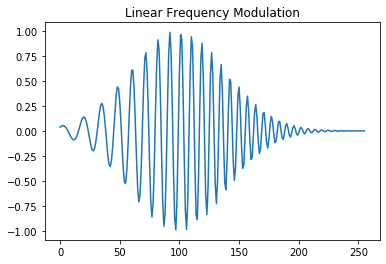

In [2]:
z = amgauss(256, 100, 100) * fmlin(256, 0.05, 0.2)[0]
z1 = amgauss(256, 100, 100) * fmconst(256, 0.05)[0]
z2 = amgauss(256, 100, 100) * fmconst(256, 0.2)[0]
plt.plot(np.real(z))
plt.title("Linear Frequency Modulation")
plt.show()

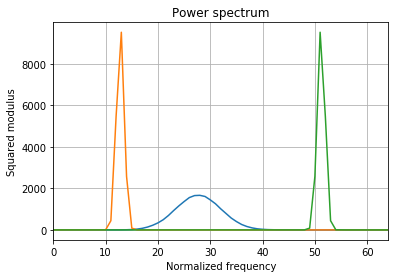

In [3]:
dsp1 = np.fft.fftshift(np.abs(np.fft.fft(z)) ** 2)
f1 = np.fft.fftshift(np.abs(np.fft.fft(z1)) ** 2)
f2 = np.fft.fftshift(np.abs(np.fft.fft(z2)) ** 2)
plt.plot(np.arange(-128, 128, dtype=float), dsp1)
plt.plot(np.arange(-128, 128, dtype=float), f1)
plt.plot(np.arange(-128, 128, dtype=float), f2)
plt.xlim(0, 64)
plt.title('Power spectrum')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized frequency')
plt.grid()
plt.show()

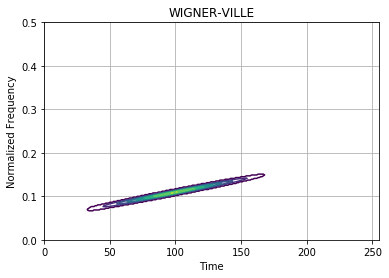

In [4]:
from tftb.processing import WignerVilleDistribution
wvd = WignerVilleDistribution(z)
wvd.run()
wvd.plot(kind='contour', extent=[0, 256, 0, 1])

### Analysis of a chirp signal from a file

In [5]:
w = wavread('./GW170817_chirp.wav')
chirp_np = np.array(w[1], dtype=float)
print("Before resampling: %d" % chirp_np.size)
chirp_np = chirp_np[chirp_np.size-2097152:chirp_np.size]
chirp_np = resample(chirp_np, 262144)

Before resampling: 2480320


In [7]:
# Ensure that highest value is in 16-bit range
audio = chirp_np * (2**15 - 1) / np.max(np.abs(chirp_np))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, 44100)
# Wait for playback to finish before exiting
play_obj.wait_done()

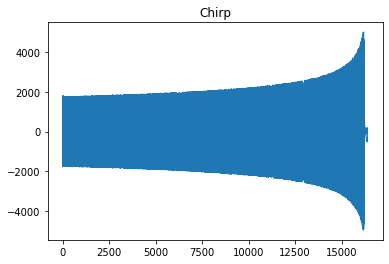

In [6]:
# reslice and further resample as we have way too many samples
z = resample(chirp_np, 16384)
plt.plot(np.real(z))
plt.title("Chirp")
plt.show()

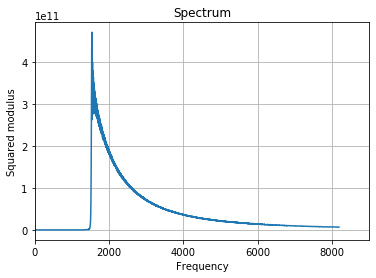

In [7]:
# Compute the full power spectrum. Note how wide it is
W = np.fft.fftshift(np.abs(np.fft.fft(z)) ** 2)
plt.plot(np.arange(-z.size/2, z.size/2, dtype=float), W)
plt.title('Spectrum')
plt.ylabel('Squared modulus')
plt.xlabel('Frequency')
plt.xlim(0)
plt.grid()
plt.show()

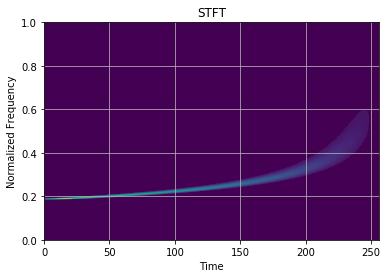

In [8]:
# compute the short Fourier Transform
from tftb.processing import ShortTimeFourierTransform
stft = ShortTimeFourierTransform(z)
stft.run()
stft.plot(extent=[0, 256, 0, 1])